In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
td = pd.read_csv('LasVegasTripAdvisorReviews-Dataset.csv', sep=';')

In [137]:
td.head(5)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [138]:
x = td['Nr. reviews'] < td['Nr. hotel reviews']

In [139]:
score = td[['Score','Nr. reviews']].groupby('Score').agg('count')
bar_labels = np.array(['1','2','3','4','5'])

In [140]:
score['count'] = score['Nr. reviews']
score

,Nr. reviews,count
Score,,
1,11,11
2,30,30
3,72,72
4,164,164
5,227,227


In [141]:
#figure out how to conver the Nr. reviews variable to a List so that you can use it in the plt.bar

In [142]:
score[['Nr. reviews']]

,Nr. reviews
Score,
1,11
2,30
3,72
4,164
5,227


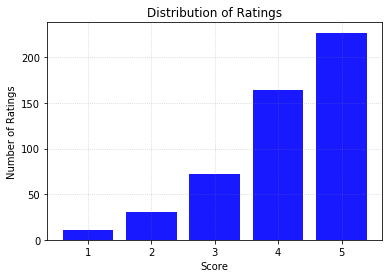

In [143]:
#First, let's take a look at the distrubtion of ratings accross all traveler types.


value = score['Nr. reviews']
bar_labels = np.arange(1,6)

plt.bar(bar_labels,
       value,
       align='center',
       color='blue',
       alpha=.9)

plt.ylabel('Number of Ratings')
plt.xlabel('Score')
plt.title('Distribution of Ratings')

plt.grid(color = 'grey', linestyle = 'dotted',alpha=.4)
plt.show()

In [144]:
score2 = td[['Score','Nr. hotel reviews']].groupby('Score').agg('count')
bar_labels2 = np.array(['0','50','100','150','200','250','300'])

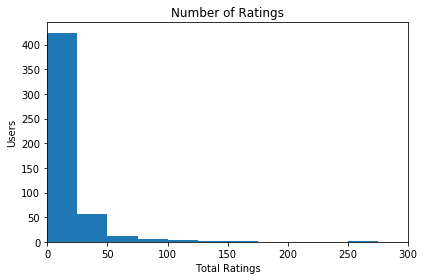

In [145]:
#It looks like the majority of ratings are positive.

#Now let's see how often the average user is rating their hotels.

plt.hist(td['Nr. hotel reviews'], bins=[0,25,50,75,100,125,150,175,200,225,250,275])
plt.ylabel('Users')
plt.xlabel('Total Ratings')
plt.title('Number of Ratings')
plt.xlim(0,300)
plt.tight_layout()
plt.show()

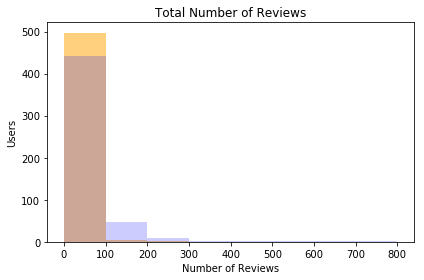

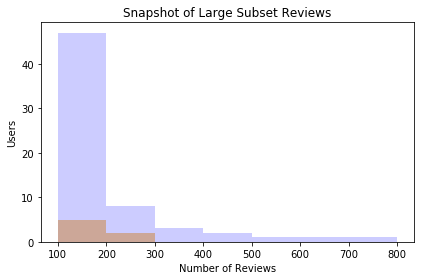

In [146]:
#It looks like a large set of members rate from 0-50 times.

#Now let's look at how often someone posts any review vs. a hotel review.

plt.hist(td['Nr. hotel reviews'], bins=[0,100,200,300,400,500,600,700,800], color='orange', alpha=.5)
plt.hist(td['Nr. reviews'], bins=[0,100,200,300,400,500,600,700,800], color='blue', alpha=.2)
plt.ylabel('Users')
plt.xlabel('Number of Reviews')
plt.title('Total Number of Reviews')
plt.tight_layout()
plt.show()

plt.hist(td['Nr. hotel reviews'], bins=[100,200,300,400,500,600,700,800], color='orange', alpha=.5)
plt.hist(td['Nr. reviews'], bins=[100,200,300,400,500,600,700,800], color='blue', alpha=.2)
plt.ylabel('Users')
plt.xlabel('Number of Reviews')
plt.title('Snapshot of Large Subset Reviews')
plt.tight_layout()
plt.show()

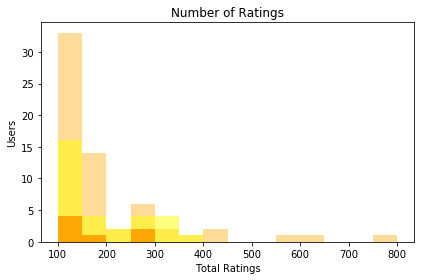

In [147]:
#It looks like hotel reviews are just a small subset of overall reviews.

#Lastly, let's look at the number of helpful votes from members vs. reviews vs. hotel reviews. 

plt.hist(td['Nr. hotel reviews'],bins=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800], color='red', alpha=.9)
plt.hist(td['Nr. reviews'],bins=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800], color='orange', alpha=.4)
plt.hist(td['Helpful votes'],bins=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800], color='yellow',alpha=.5)
plt.ylabel('Users')
plt.xlabel('Total Ratings')
plt.title('Number of Ratings')
plt.tight_layout()
plt.show()

In [148]:
#It looks like the number of helpful reviews is slighly higher than the number of hotel reviews.